In [174]:
# 线性回归的从零实现
%matplotlib inline
import torch
import random
from d2l import torch as d2l

In [175]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, [num_examples, len(w)])
    y = torch.matmul(X, w) + torch.normal(0, 0.01, [num_examples]) + b
    return X, y.reshape(-1,1)

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b, 1000)

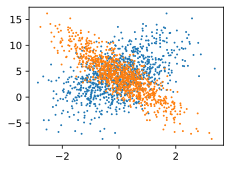

In [176]:
d2l.set_figsize()
d2l.plt.scatter(features[:,0].detach().numpy(), labels.detach().numpy(), 1);
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1);

In [177]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.3015, -2.1640],
        [-2.8596, -1.2727],
        [-0.4156, -0.2683],
        [ 0.4813,  0.6751],
        [-0.4526,  0.2688],
        [-1.0842,  0.7446],
        [ 2.2239, -0.5995],
        [-0.4043, -1.4834],
        [ 0.7362, -0.6115],
        [-0.2993, -0.0075]]) 
 tensor([[ 8.9505],
        [ 2.8078],
        [ 4.2813],
        [ 2.8842],
        [ 2.3557],
        [-0.5059],
        [10.7043],
        [ 8.4498],
        [ 7.7652],
        [ 3.6336]])


In [178]:
w = torch.normal(0, 0.001, size = [2,1], requires_grad = True)
b = torch.zeros(1, requires_grad = True )

In [179]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) **2 /2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [180]:
lr = 0.01
num_epochs = 9
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss{float(train_l.mean()):f}')

epoch 1, loss2.402461
epoch 2, loss0.384088
epoch 3, loss0.062251
epoch 4, loss0.010222
epoch 5, loss0.001725
epoch 6, loss0.000329
epoch 7, loss0.000097
epoch 8, loss0.000058
epoch 9, loss0.000052


In [181]:
# 线性回归的简洁实现
import torch
import numpy as np
from torch.utils import data
from d2l import torch as d2l

In [182]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [183]:
def load_array(data_arrays, batch_size, is_train = True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle = is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[ 0.3875, -0.9635],
         [ 0.9802,  1.6014],
         [ 0.7148,  2.5849],
         [-1.1530,  1.0089],
         [ 0.8859,  0.2130],
         [-0.4084, -1.2158],
         [ 0.4955, -0.7801],
         [ 0.6138,  0.6259],
         [ 0.0728, -0.0924],
         [-1.0254,  0.5812]]),
 tensor([[ 8.2546],
         [ 0.7200],
         [-3.1612],
         [-1.5275],
         [ 5.2558],
         [ 7.5136],
         [ 7.8244],
         [ 3.2920],
         [ 4.6690],
         [ 0.1730]])]

In [184]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr = 0.01)

In [185]:
num_epochs = 9
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch+1}, loss {l:f}')

epoch 1, loss 0.559995
epoch 2, loss 0.009489
epoch 3, loss 0.000254
epoch 4, loss 0.000101
epoch 5, loss 0.000098
epoch 6, loss 0.000097
epoch 7, loss 0.000097
epoch 8, loss 0.000097
epoch 9, loss 0.000097
